In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading data
irisData = load_iris()

# Seperating features and target
x = irisData.data
y = irisData.target

# Printing Data Shape
print('x matrix dimensionality : ', x.shape)
print('y matrix dimensionality : ', y.shape)

x matrix dimensionality :  (150, 4)
y matrix dimensionality :  (150,)


In [3]:
irisData.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
irisData.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
irisData.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Spliting the data into training and testing
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size = 0.2, random_state = 5)

In [7]:
# Model Building
knn = KNeighborsClassifier(n_neighbors = 4)

# Fitting the model
knn.fit(x_train, y_train)

# Predicting from the model
y_pred = knn.predict(x_test)
print(y_pred)

[1 2 2 0 2 1 0 2 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 2 1 2 1 1 1 2]


In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]


In [9]:
# (2*100)/30 = 6.67%(Error)
#  (28*100)/30 = 93.33%(Accuracy)

In [10]:
# Searching for optimal value of k

# list of scores from k_range
k_range = range(2,20)

# Empty list to store scores
k_scores = []

# Lopping through different values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=5, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9733333333333334, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666666, 0.9666666666666668]


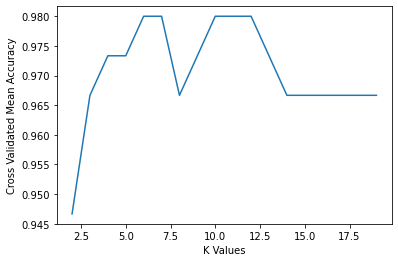

In [11]:
# Plotting
plt.plot(k_range,k_scores)
plt.xlabel('K Values')
plt.ylabel('Cross Validated Mean Accuracy')
plt.show()

In [12]:
# Optimum k values can be 6,7,10,11,12
# Since 6 and 12 are divisible by 3 we can discard them,
# Out of 7, 10, 11 we will take the optimum value as 7 

In [15]:
# Model Building
knn = KNeighborsClassifier(n_neighbors = 7)

# Fitting the model
knn.fit(x_train, y_train)

# Predicting from the model
y_pred = knn.predict(x_test)
print(y_pred)

[1 2 2 0 2 1 0 2 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]


In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
